# SDA: Project

**Name**: Nitai Nijholt

**Student ID**: 12709018

In [1]:
#loading the Twitter sentiment dataset

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import os
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import sys
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR, VARMAX
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_arch

In [3]:
#returning the filenames

dirname = 'C:\\Users\\Nitai Nijholt\\OneDrive\\Desktop\\Scientific Data Analaysis Uva Course\\Project\\'
filenames = os.listdir(dirname)
filenames


['companiesmarketcap.com - Companies ranked by Market Cap - CompaniesMarketCap.com.csv',
 'tweets_labelled_09042020_16072020.csv',
 'tweets_remaining_09042020_16072020.csv',
 'us_equities_news_dataset.csv']

In [4]:
# Twitter sentiment data about stocks, labeled: 'tweets_labelled_09042020_16072020.csv',
# reference to dataset: https://www.kaggle.com/datasets/utkarshxy/stock-markettweets-lexicon-data

twitter_sentiment_data_labled = pd.read_csv(dirname + filenames[1], sep=';',error_bad_lines=False )

df = twitter_sentiment_data_labled

In [5]:
twitter_sentiment_data_labled.shape

(5000, 4)

In [6]:
df.columns

Index(['id', 'created_at', 'text', 'sentiment'], dtype='object')

In [7]:
#data cleaning



In [8]:
df[df['sentiment'].isnull()]

,id,created_at,text,sentiment
1300,254563,2020-04-29 01:57:02+00:00,- @investbamboo get $ share on Bamboo then. [ ...,NaN
1301,280832,2020-05-05 17:58:44+00:00,H&amp;S just formed on 4h chart $spx $spy http...,NaN
1302,672447,2020-06-26 15:29:14+00:00,@EddyElfenbein what happened to $FB?,NaN
1303,146759,2020-04-21 11:53:54+00:00,RT @CHItraders: $AAPL expands services busines...,NaN
1304,116538,2020-04-19 23:34:14+00:00,RT @Lakshmi_888: #SPX $SPX #ES_F $NQ $RUT #DAX...,NaN
...,...,...,...,...
4995,411380,2020-06-04 18:14:57+00:00,"With ad revenues falling, what’s the impact on...",NaN
4996,62318,2020-04-14 02:15:01+00:00,RT @KelvinSCWong: Well another point to add to...,NaN
4997,627230,2020-06-23 14:08:15+00:00,$ITOX working on a contract with a fortune 500...,NaN
4998,890123,2020-07-14 23:18:34+00:00,"$DIS it could break the 120 pin, then 125&gt; ...",NaN


In [9]:
df[df['sentiment'].notnull()]


,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive
...,...,...,...,...
1295,75519,2020-04-15 06:00:10+00:00,#stocks back from the recovery room: https://t...,positive
1296,739234,2020-07-01 11:29:10+00:00,RT @MacroCharts: Breadth – expanding last week...,positive
1297,254379,2020-04-29 02:21:50+00:00,RT @MawsonResource: Rompas-Rajapalot: A Big Ne...,neutral
1298,580441,2020-06-19 17:56:57+00:00,$AAPL $QQQ Top may now be in. https://t.co/iNK...,positive


We can see the first 1300 rows have sentiment data, so we quantify the sentiment data for only these rows

In [10]:
subset_data_with_sentiment = df.iloc[0:1300]

In [11]:
subset_data_with_sentiment.shape
df = subset_data_with_sentiment
# shape looks good

In [12]:
#positive

list_of_sentiment = []
list_of_rows_without_sentiment =[]
for i in df[ 'sentiment']:
    if i == 'positive':
        list_of_sentiment.append(1)
    if i == 'neutral':
        list_of_sentiment.append(0)
    if i == 'negative':
        list_of_sentiment.append(-1)
    
        



In [13]:
df['quantitative sentiment'] = list_of_sentiment

<ipython-input-13-752bd2b4f3e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quantitative sentiment'] = list_of_sentiment


In [14]:
df

,id,created_at,text,sentiment,quantitative sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive,1
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative,-1
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive,1
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive,1
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive,1
...,...,...,...,...,...
1295,75519,2020-04-15 06:00:10+00:00,#stocks back from the recovery room: https://t...,positive,1
1296,739234,2020-07-01 11:29:10+00:00,RT @MacroCharts: Breadth – expanding last week...,positive,1
1297,254379,2020-04-29 02:21:50+00:00,RT @MawsonResource: Rompas-Rajapalot: A Big Ne...,neutral,0
1298,580441,2020-06-19 17:56:57+00:00,$AAPL $QQQ Top may now be in. https://t.co/iNK...,positive,1


In [15]:
    # FINANCIAL NEWS 
news = pd.read_csv('C:\\Users\\Nitai Nijholt\\OneDrive\\Desktop\\Scientific Data Analaysis Uva Course\\Project\\us_equities_news_dataset.csv')

    # TOP 7106 COMPANIES BY MARKET CAP
market = pd.read_csv('C:\\Users\\Nitai Nijholt\\OneDrive\\Desktop\\Scientific Data Analaysis Uva Course\\Project\\companiesmarketcap.com - Companies ranked by Market Cap - CompaniesMarketCap.com.csv')

In [16]:
# FIND MOST FREQUENTLY MENTIONED TICKERS
tickers = news['ticker'].value_counts()
tick_mc = market[['Rank','Symbol','marketcap']]
tick_an = pd.DataFrame({'Symbol':list(tickers.index),'Article_n':list(tickers)})
# tick_mc_an = tick_mc.merge(tick_an, on = 'Symbol').head(n=20).sort_values(by= 'Article_n', ascending= False)
tick_mc_an = tick_mc.merge(tick_an, on = 'Symbol').head(n=20).sort_values(by= 'Rank', ascending= True)
tick_mc_an.head(n = 20)


,Rank,Symbol,marketcap,Article_n
0,1,AAPL,2245746491392,20231
1,3,MSFT,1791532859392,8110
2,5,AMZN,942841135104,6330
3,7,TSLA,562562130000,4283
4,8,UNH,493336264704,327
5,9,JNJ,460383748096,763
6,10,XOM,455235764224,2831
7,11,V,442776518656,193
8,12,WMT,415197298688,1267
9,14,JPM,400557768704,2600


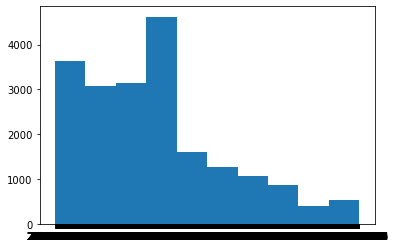

In [17]:
apple_data = news[news['ticker'] == 'AAPL']
plt.hist(apple_data['release_date'])
plt.xticks()

max(apple_data['release_date'])[8:10]
date_max = datetime.date(int(max(apple_data['release_date'])[0:4]),int(max(apple_data['release_date'])[5:7]),int(max(apple_data['release_date'])[8:10]))
date_min = datetime.date(int(min(apple_data['release_date'])[0:4]),int(min(apple_data['release_date'])[5:7]),int(min(apple_data['release_date'])[8:10]))

In [18]:
top_10_ranked_stocks_by_marketcap = tick_mc_an.loc[0:10, "Symbol"]
top_10_ranked_stocks_by_marketcap

0     AAPL
1     MSFT
2     AMZN
3     TSLA
4      UNH
5      JNJ
6      XOM
7        V
8      WMT
9      JPM
10    NVDA
Name: Symbol, dtype: object

In [30]:
top_10_ranked_stocks_by_marketcap_str = top_10_ranked_stocks_by_marketcap.astype(str).values.tolist()

In [28]:
top_10_ranked_stocks_by_marketcap_str[0]

'AAPL'

In [21]:
msft = yf.Ticker("MSFT")

In [22]:
hist = msft.history(period="5d")

In [23]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-25 00:00:00-05:00,247.309998,248.699997,246.729996,247.490005,9200800,0,0
2022-11-28 00:00:00-05:00,246.080002,246.649994,240.800003,241.759995,24778200,0,0
2022-11-29 00:00:00-05:00,241.399994,242.789993,238.210007,240.330002,17956300,0,0
2022-11-30 00:00:00-05:00,240.570007,255.330002,239.860001,255.139999,47553800,0,0
2022-12-01 00:00:00-05:00,253.869995,256.119995,250.919998,254.690002,25931257,0,0


In [ ]:
downloaded_stock_data = yf.download(top_10_ranked_stocks_by_marketcap_str, start="2011-01-01", end="2019-12-31", group_by="ticker")

In [ ]:
dataframe_stock_data = pd.DataFrame(downloaded_stock_data)

In [ ]:
dataframe_stock_data

In [26]:
# download(top_10_ranked_stocks_by_marketcap_str[0])

Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\Nitai Nijholt\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\Nitai Nijholt\anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Nitai Nijholt\anaconda3\lib\site-packages\multitasking\__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "C:\Users\Nitai Nijholt\anaconda3\lib\site-packages\yfinance\multi.py", line 199, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "C:\Users\Nitai Nijholt\anaconda3\lib\site-packages\yfinance\multi.py", line 213, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "C:\Users\Nitai Nijholt\anaconda3\lib\site-packages\yfinance\base.py", line 156, in history
    tz = self._get_ticker_tz(debug_mode, proxy, timeout)
  File "C:\Users\Nitai Nijholt\anaconda3\li

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv("Data/stock_data.csv")
df = df.rename(columns={"Unnamed: 0": "Date"})
df = df.drop([0, 1])

In [ ]:
def plot_stocks(df: pd.DataFrame, tickers: list):
    x_values = [dt.strptime(d, "%Y-%m-%d").date() for d in df["Date"]]
    for ticker in tickers:
        y_values = [float(price) for price in df[ticker]]
        plt.plot(x_values, y_values, label = ticker)
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.show()

In [ ]:
plot_stocks(df, ["AMZN", "AAPL"])

## The code below is copied from my thesis, most of it will probably be usefull. will sort out later which parts we need and which we dont as the anaylisis proceeds

In [ ]:
#checking if the timeseries are stationairy

stationary_series =[]
Non_stationairy_series = []

for variable in df.columns:
    print(f"Output results augmented Dickey Fuller test for variable: {variable}")
    results_augmented_dickey_fuller = adfuller(df[variable])
    print('ADF Statistic: %f' % results_augmented_dickey_fuller[0])
    print('p-value: %f' % results_augmented_dickey_fuller[1])
    print('Critical Values:')
    for key, value in results_augmented_dickey_fuller[4].items():
        print('\t%s: %.3f' % (key, value))

    if results_augmented_dickey_fuller[1] <= 0.05:
        print("Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary")
        Stationary_series.append(variable)
    else:
        print("Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary")
        Non_stationairy_series.append(variable)
        
print(f"-------------------------------------------------------------------------------------------------------------------------------Stationary_series: {Stationary_series}, Non_stationairy_series: {Non_stationairy_se

In [ ]:
#testing partial auto correlations
for variable in df.columns:
    plot_pacf(df[variable], lags = 5)
    print(variable)
    plt.show()

In [ ]:
for variable in df.columns:
    plot_acf(df[variable], lags = 5)
    print(variable)
    plt.show()

In [ ]:
modelVAR = VAR(df)

In [ ]:
modelVAR.select_order(maxlags = 3).summary()

In [ ]:
results = modelVAR.fit(3)
results.summary()

In [ ]:
#results indicate significant residual auto correlation

results.test_whiteness().summary()

In [ ]:
#Normality looks okay

results.test_normality().summary()

In [ ]:
#printing skewness per variable

Skewed_variables = []
Kurtosis_conaining_variables = []

for i in df.columns:
    print(df[i].describe())
    print(f'Kurtosis: {df[i].kurtosis()}')
    print(f'Skewness: {df[i].skew()}')
    if df[i].kurtosis() <= -10 or df[i].kurtosis() >= 10:
        Kurtosis_conaining_variables.append(i)
    else: 
        continue
    if df[i].skew() >= 3 or df[i].skew() <= -3:
        Skewed_variables.append(i)


if len (Skewed_variables) == 0:
        print(f'all variables have skewness in acceptable ranges (-3 < skewness < 3)')
if len (Kurtosis_conaining_variables) == 0:
        print(f'all variables have kurtosis in acceptable ranges (-10 < kurtosis < 10)')

In [ ]:
corr = df.corr()
corr
# corr.style.background_gradient(cmap='coolwarm')

In [ ]:
#testing for ARCH effects

residuals = resultsVECM_oldagedependecyratio_exogcoint.resid
print("Engle’s Test for Autoregressive Conditional Heteroscedasticity (ARCH)\n")
for i in range(len(residuals[0,:])):
    het_test_result= het_arch(residuals[:,i],nlags=2)
    print(f'the Lagrange multiplier test of variable: {endog.columns[i]} has test statistic: {het_test_result[0]} and has p-value: {het_test_result[1]}')
    if het_test_result[1] <=0.05:
        print('found p-value < 0.05, so H0: no Autoregressive Conditional Heteroscedasticity is rejected\n')
    else:
        print('found p-value > 0.05, so H0: no Autoregressive Conditional Heteroscedasticity is not rejected\n')

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(residuals)

In [ ]:

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=2
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


df_1 = grangers_causation_matrix(df, variables = df.columns)  
df_1
